In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import math
import cycler

In [41]:
T_CMB=2.725

In [42]:
mod0 = np.loadtxt("explanatory03_cl_lensed.dat")
mod1 = np.loadtxt("freestreaming_cl_lensed.dat")
mod2 = np.loadtxt("fluid_cl_lensed.dat")
mod3 = np.loadtxt("inst_decouple_z1e4_cl_lensed.dat")
mod4 = np.loadtxt("decouple_zdec1e4_cl_lensed.dat")

models = [mod0, mod1, mod2, mod3, mod4]

ll_values = []
tt_values = []
ee_values = []
labels = ["fudicial", "free_streaming", "fluid", "inst decoupl", "decoupl"]

#norm = models.get(0).lensed_cl(2500)['tt'][400]
for  model in models:
    ll = model[:,0]
    cl_tt = model[:,1]
    cl_ee = model[:,2]
    ll_values.append(ll)
    tt_values.append(cl_tt)
    ee_values.append(cl_ee)


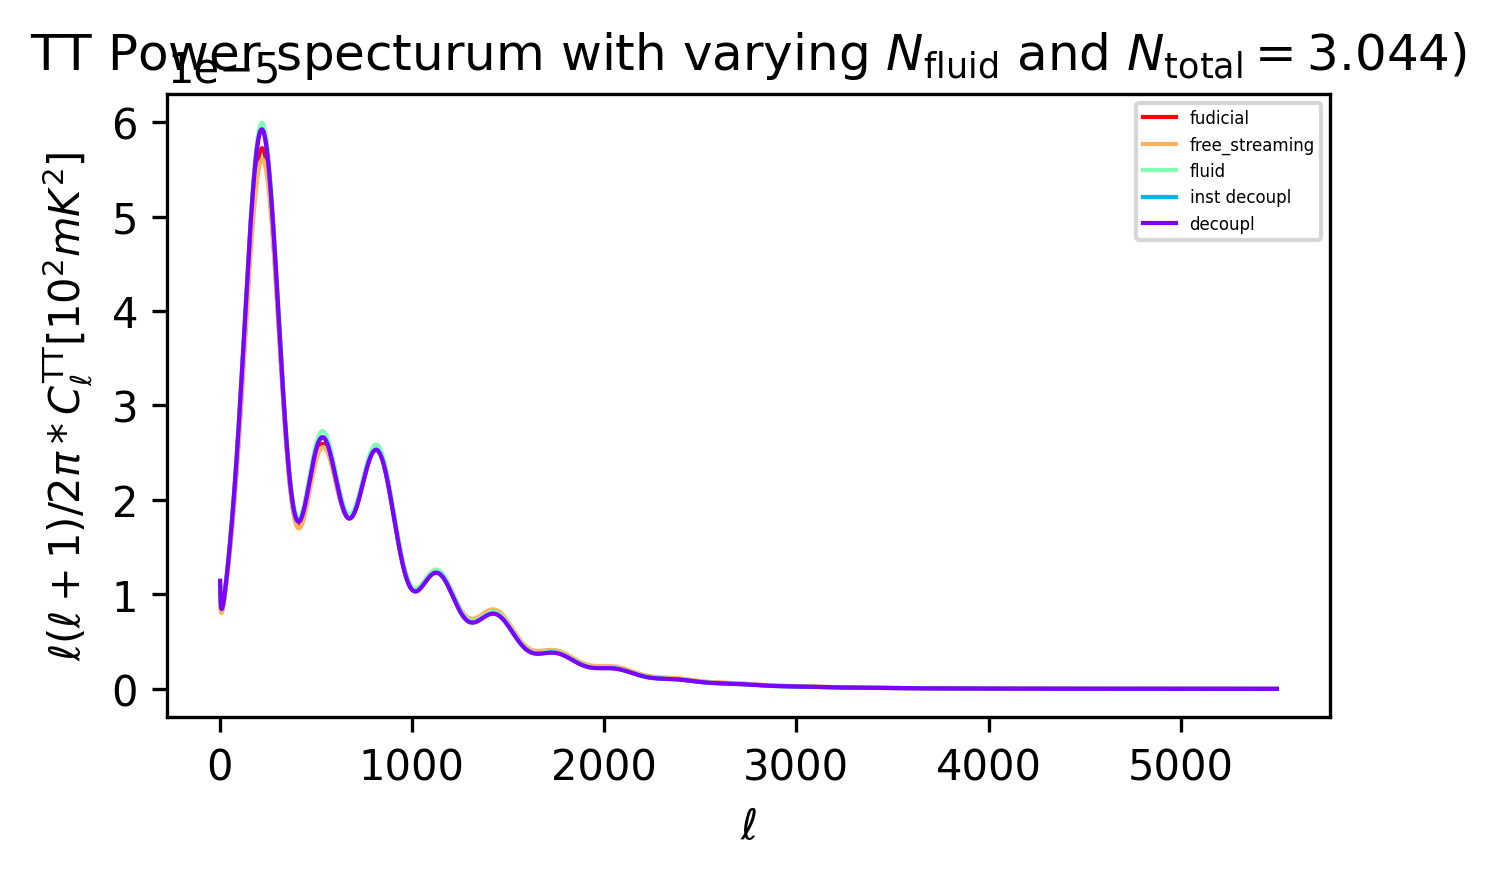

In [43]:
plt.rc('lines', linewidth=1)
#plt.rc('axes', prop_cycle=(cycler.cycler('color', ['r', 'g', 'b', 'y']) + cycler.cycler('linestyle', ['-', '--', ':', '-.'])))

color = plt.cm.rainbow(np.flip(np.linspace(0, 1, len(ll_values))))
plt.rcParams["figure.figsize"] = (5,2.75)
plt.rcParams['figure.dpi'] = 300


for i in range(len(ll_values)):

    #plt.xlim(500,2500)
    ll = ll_values[i]
    cl_tt = tt_values[i]
    
    plt.xscale('linear')
    plt.yscale('linear')
    #plt.xlim(400,2500)
    #plt.ylim(4,19)
    plt.xlabel('$\ell$', fontsize=10)
    plt.ylabel('$\ell (\ell+1)/2\pi * C_\ell^\mathrm{TT}  [ 10^2 mK^2] $')#, fontsize=20)
    plt.title("TT Power specturum with varying $N_{\mathrm{fluid}}$ and $N_{\mathrm{total}} = 3.044$)")#, fontsize=20)
    plt.plot(ll,cl_tt*T_CMB**2*(10**6)/(100), label = labels[i], c = color[i])
    plt.legend(loc=1, prop={'size': 4})
    #plt.xticks(np.arange(500, 2600,500))
    #plt.yticks(np.arange(6,19,4))

In [44]:
def test_Pk(models, mod1_index, mod2_index):
    model1_Pk = {'tt': tt_values[mod1_index], 'ee':ee_values[mod1_index]}
    model2_Pk = {'tt': tt_values[mod2_index], 'ee':ee_values[mod2_index]}
    T_CMB = 2.725
    for mode in ['tt','ee']:
        if np.array_equal(model1_Pk[mode], model2_Pk[mode]):
            print(mode)
            print(str(labels[mod1_index]) + " and " + str(labels[mod2_index]) + " are equivalent")
            
        else:
            
            ll = ll_values[mod1_index]
            values1 = model1_Pk[mode]*T_CMB**2*(ll)*(ll+1)*(10**12)/(2.*math.pi)
            ll = ll_values[mod2_index]
            values2 = model2_Pk[mode]*T_CMB**2*(ll)*(ll+1)*(10**12)/(2.*math.pi)
            difference = (values2-values1)/values1
            plt.figure()
            plt.xscale('linear')
            plt.yscale('linear')
            plt.xlabel('$\ell$', fontsize=10)
            plt.ylabel('$\Delta D_\ell^\mathrm{' +str(mode) + '} [ \mu K^2] $')#, fontsize=20)
            plt.title("Power specturum difference " +str(labels[mod1_index]) + " and " + str(labels[mod2_index]))#, fontsize=20)
            plt.plot(ll,difference, linestyle='--')
            plt.figure()
            plt.xlabel('$\ell$', fontsize=10)
            plt.ylabel('$\ell (\ell+1)/2\pi * C_\ell^\mathrm{TT}  [ 10^2 mK^2] $')#, fontsize=20)
            plt.title("TT Power specturum with" +str(labels[mod1_index]) + " and " + str(labels[mod2_index]))#, fontsize=20)
            plt.plot(ll,values1*T_CMB**2*(10**6)/(100), label = labels[mod1_index], c = color[mod1_index])
            plt.plot(ll,values2*T_CMB**2*(10**6)/(100), label = labels[mod2_index], c = color[mod2_index])
            plt.legend(loc=1, prop={'size': 4})
            

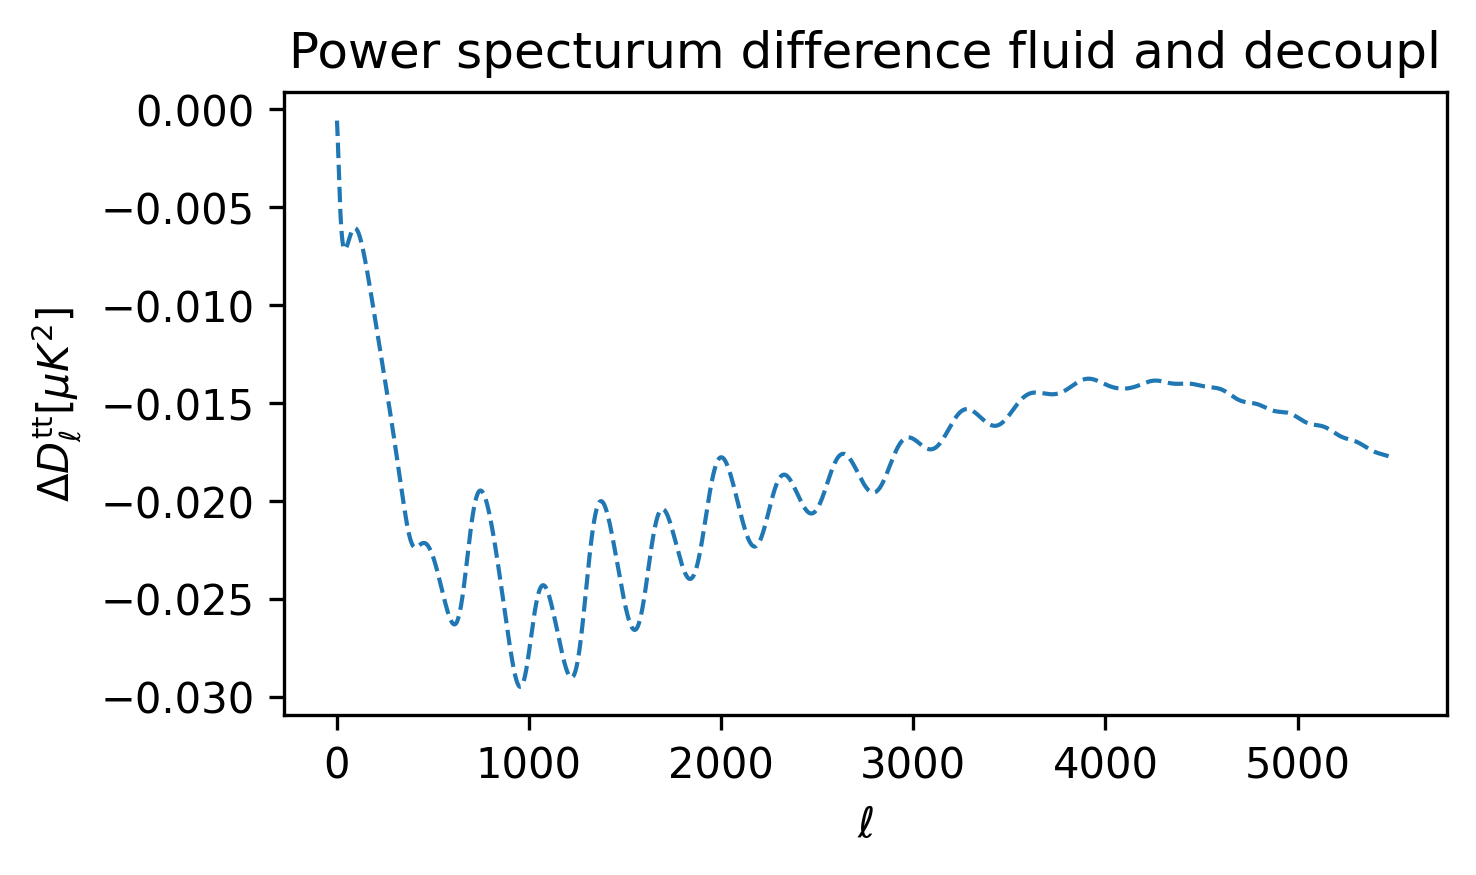

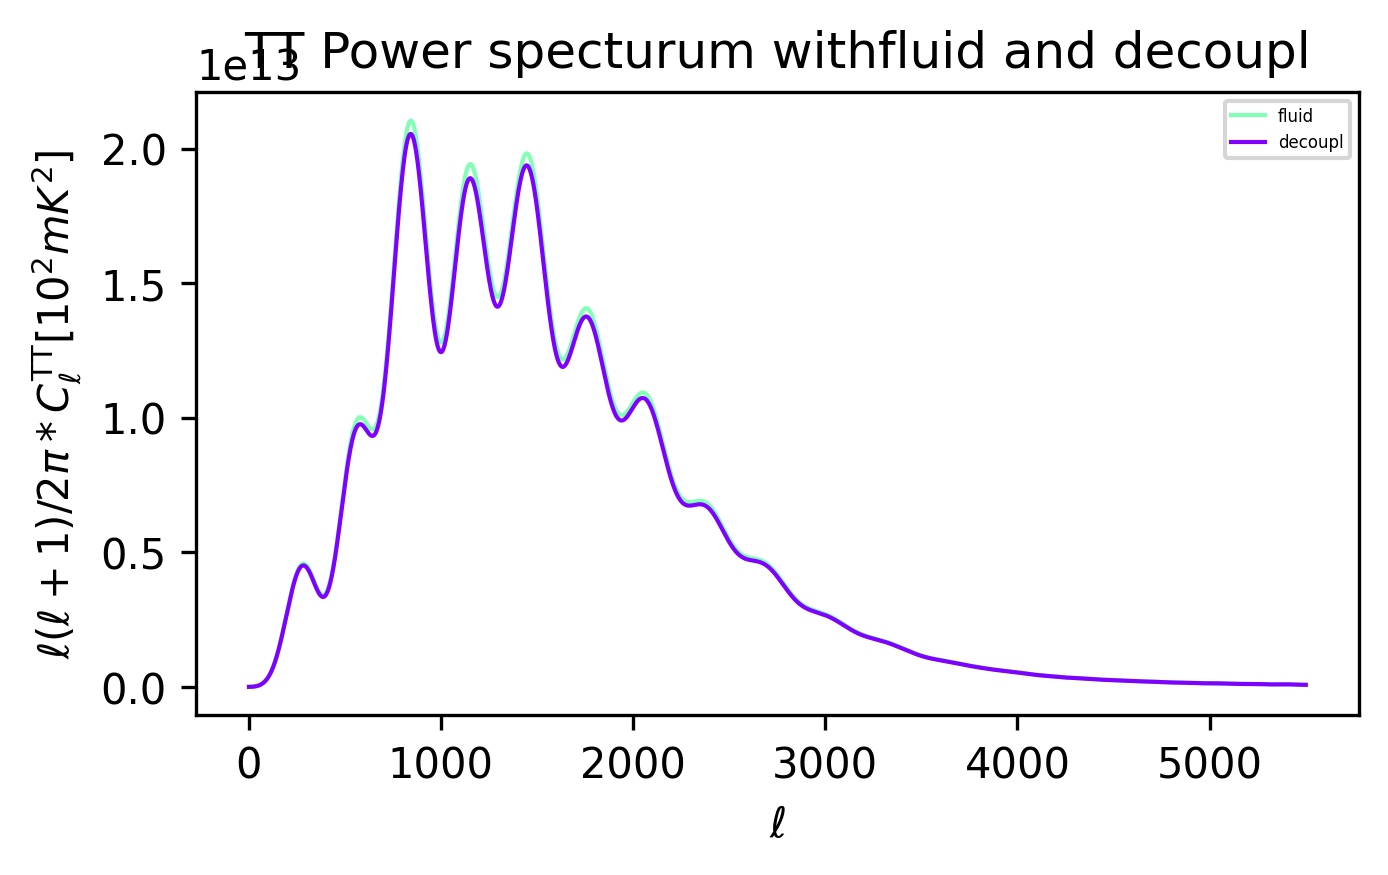

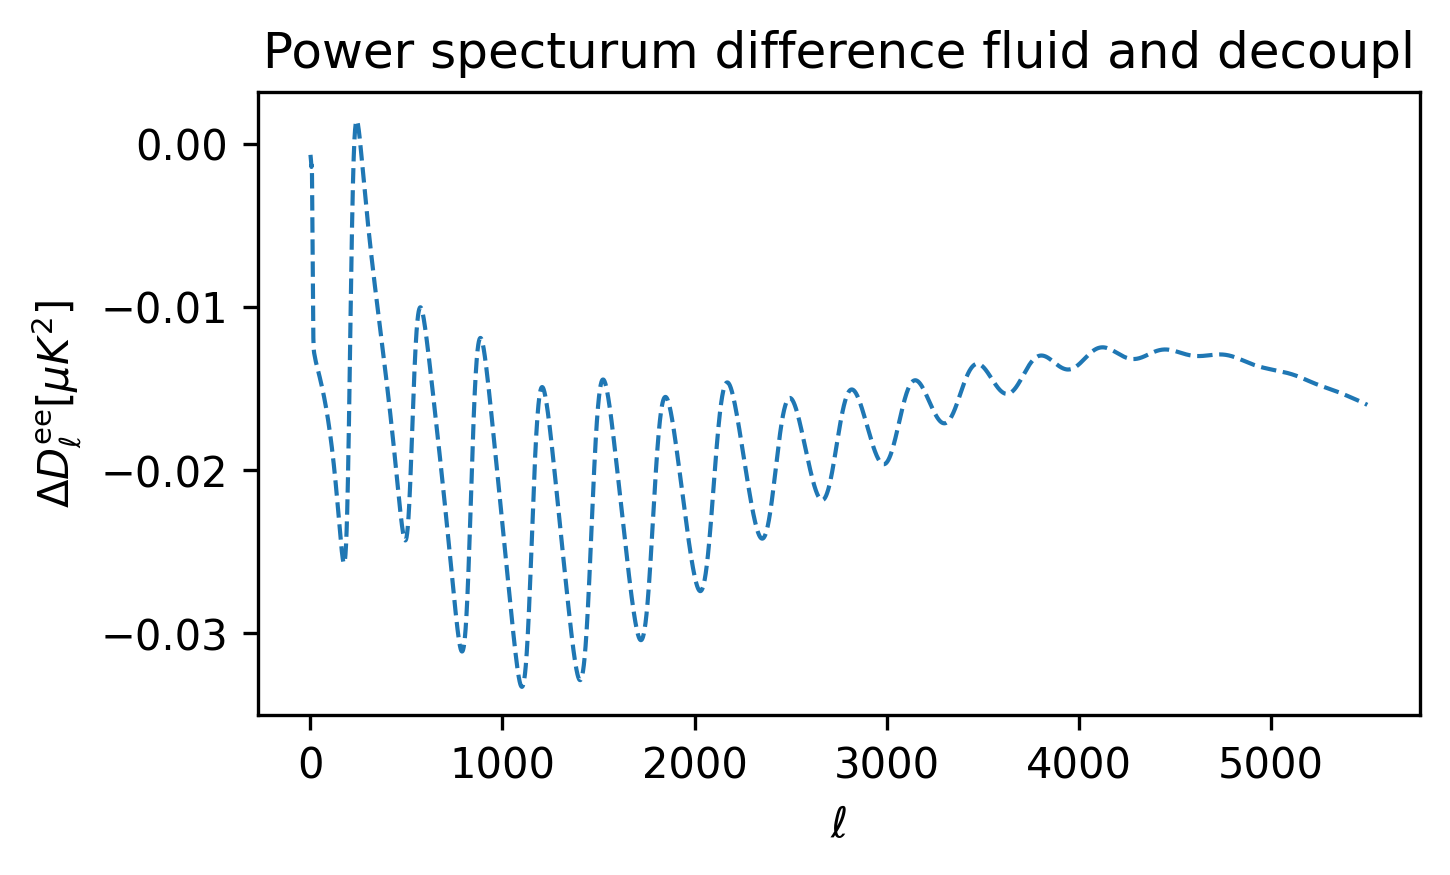

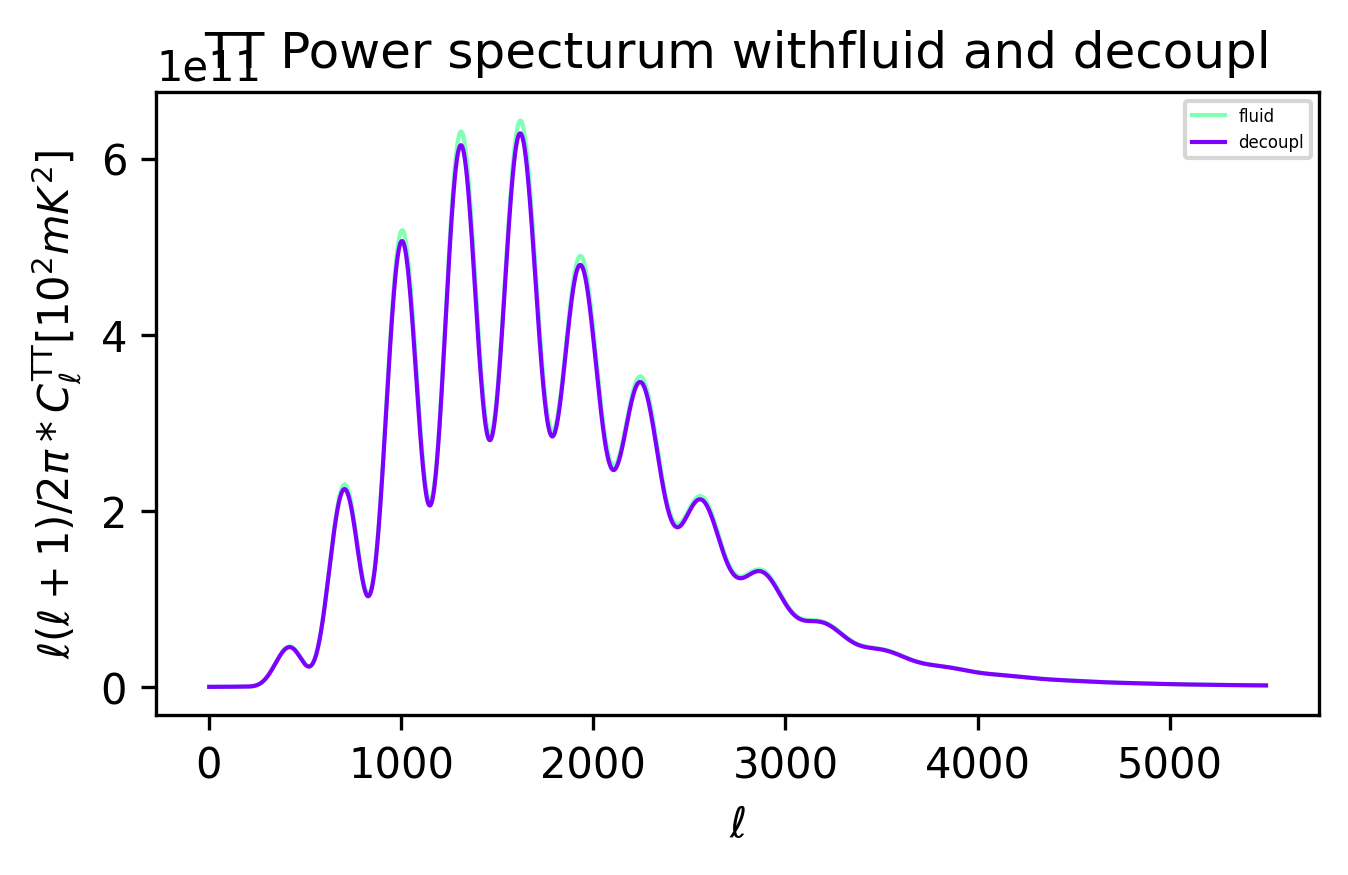

In [45]:

test_Pk(models,2,4)

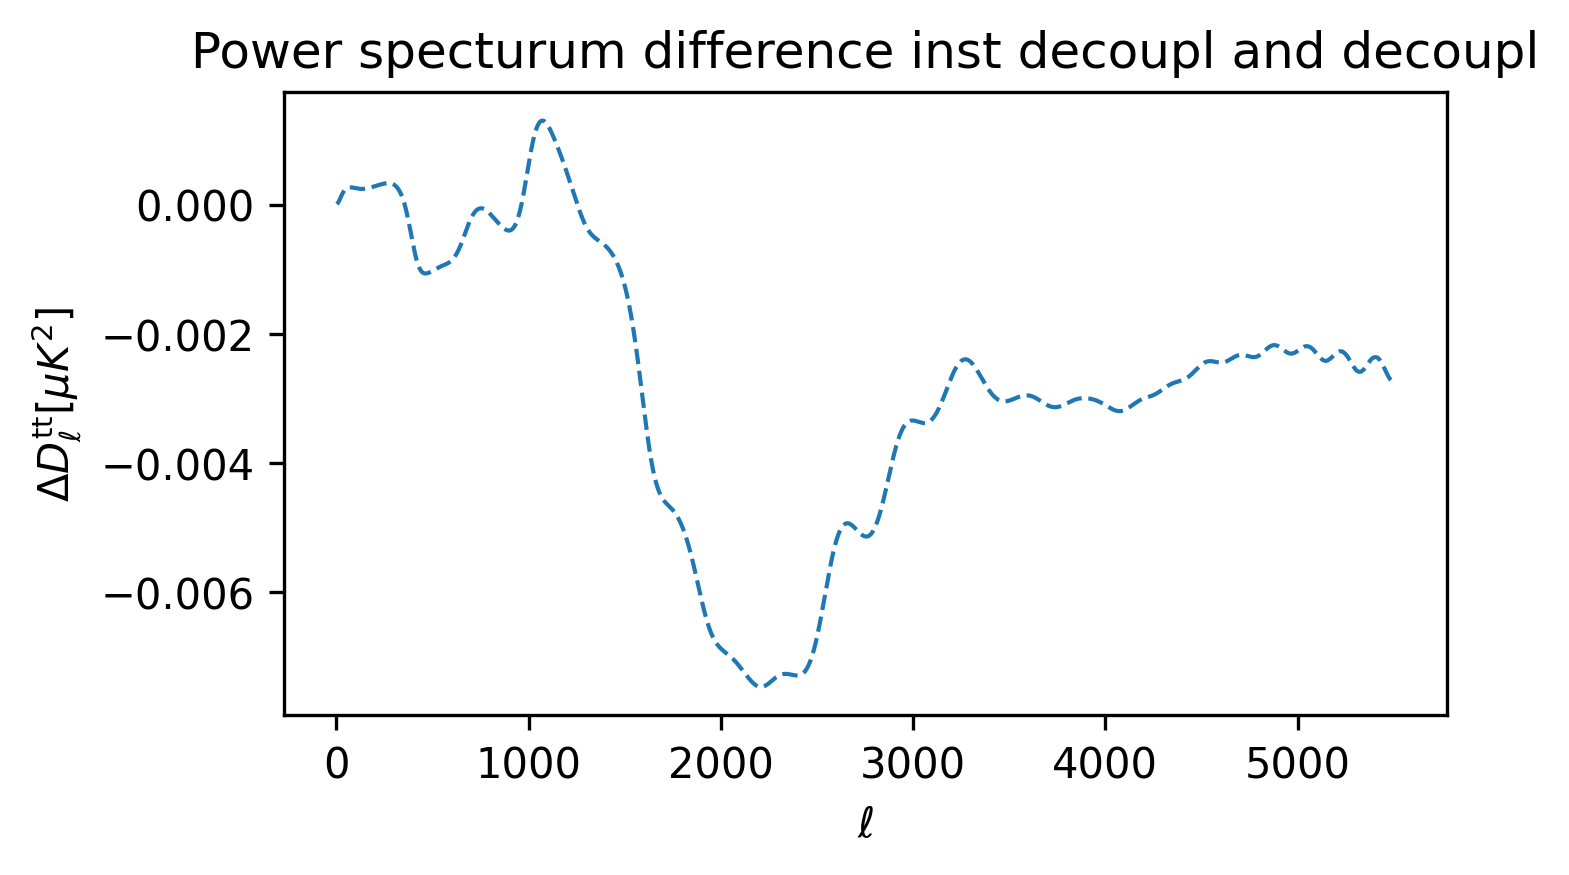

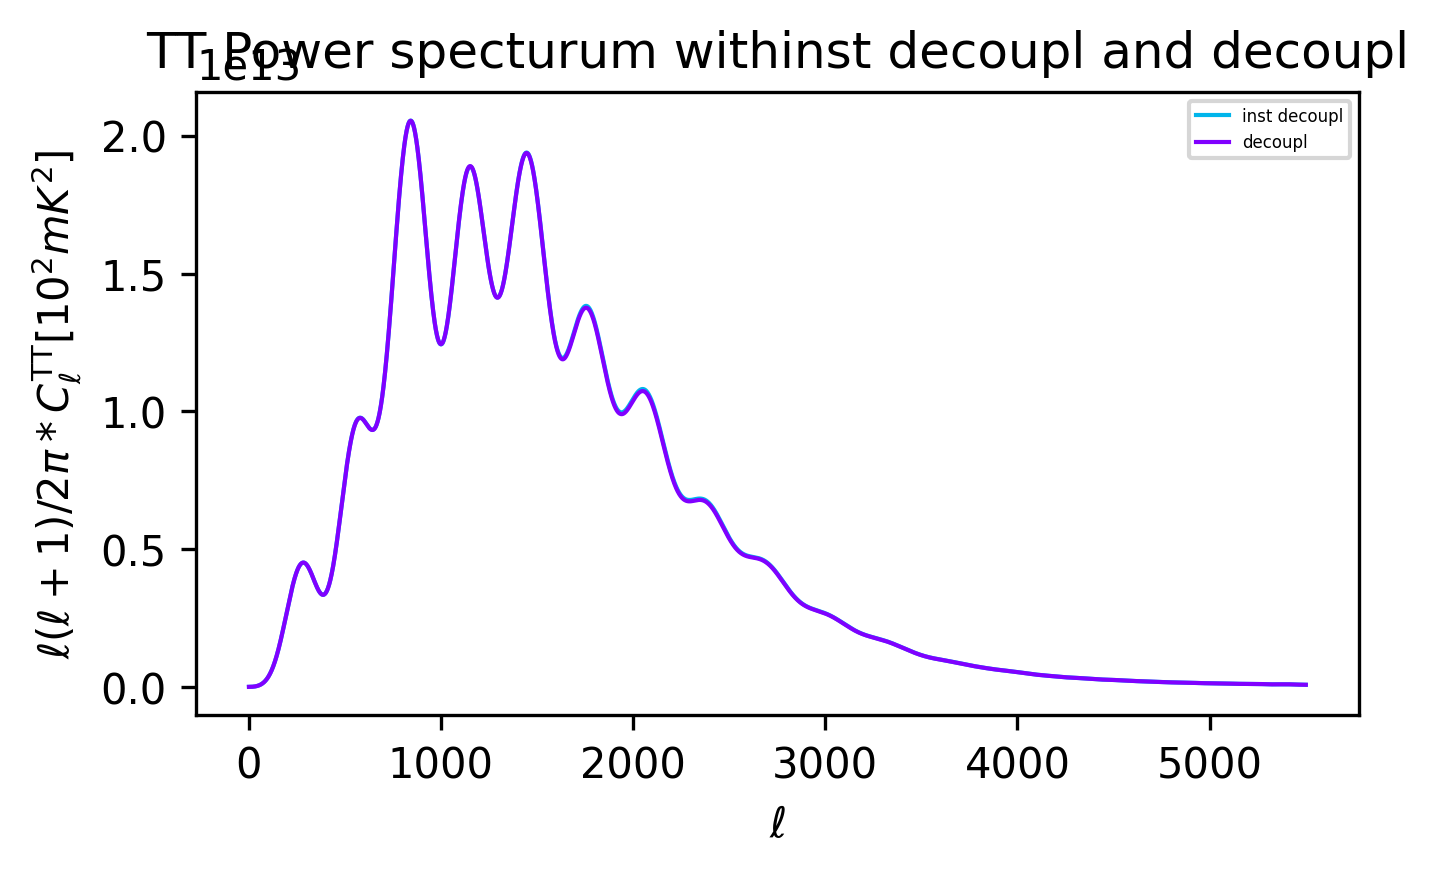

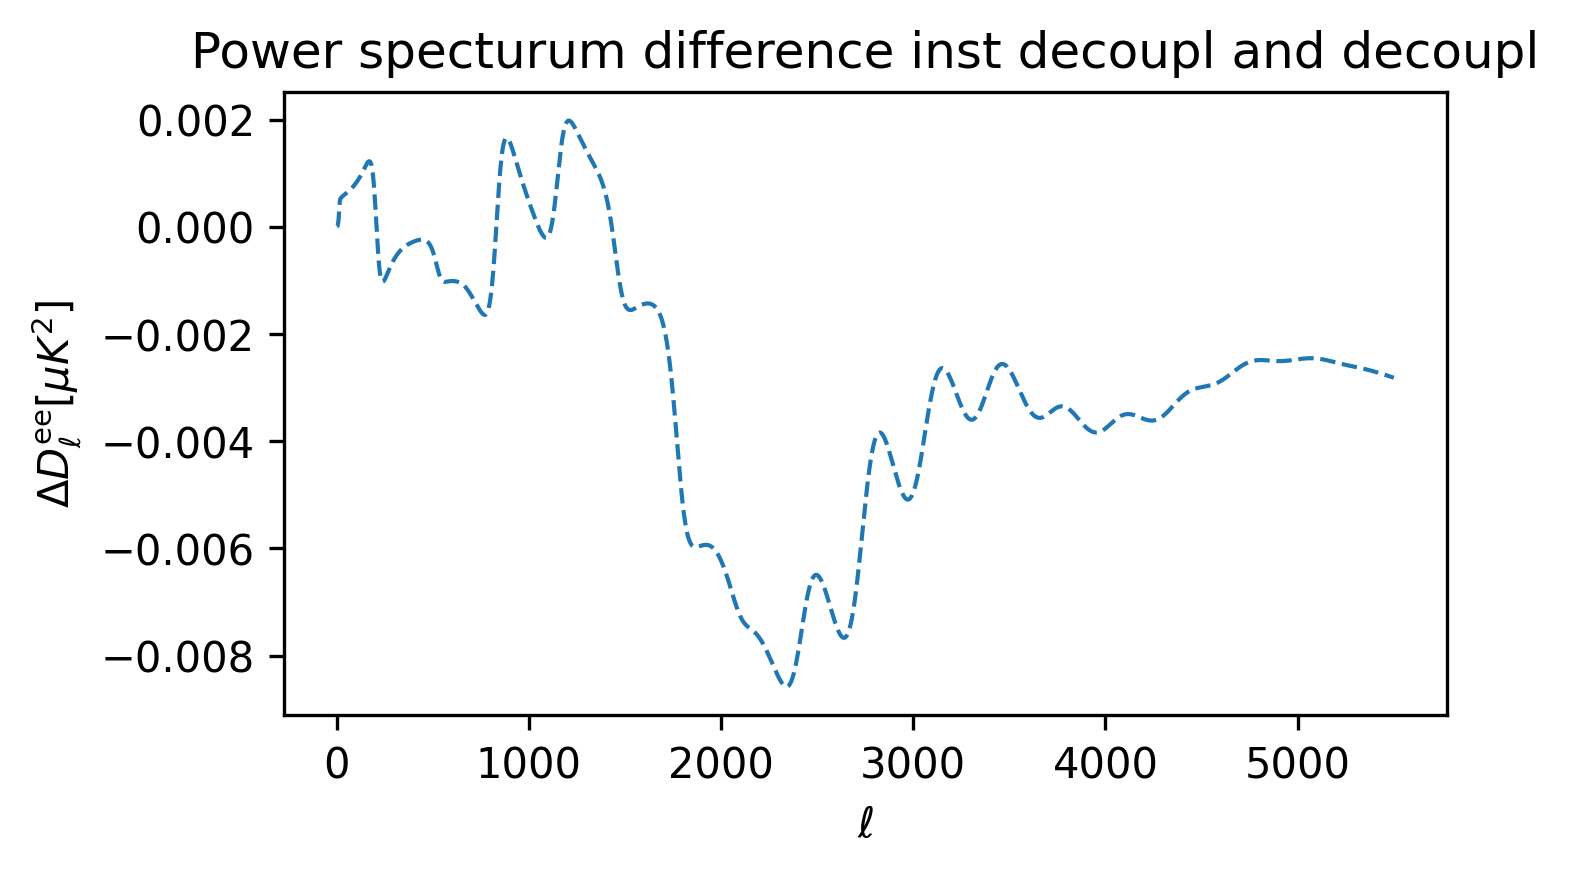

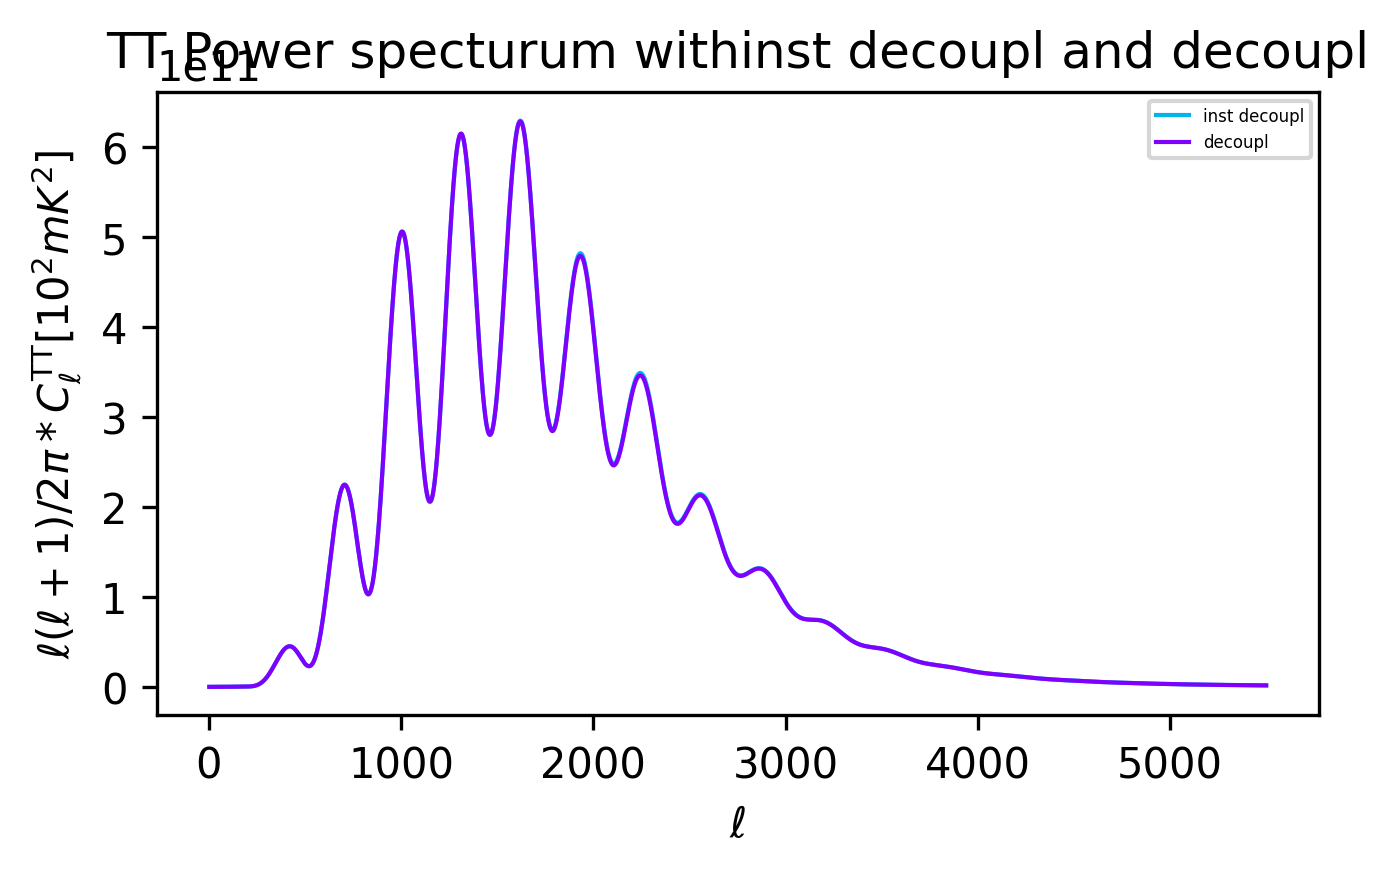

In [46]:
test_Pk(models,3,4)

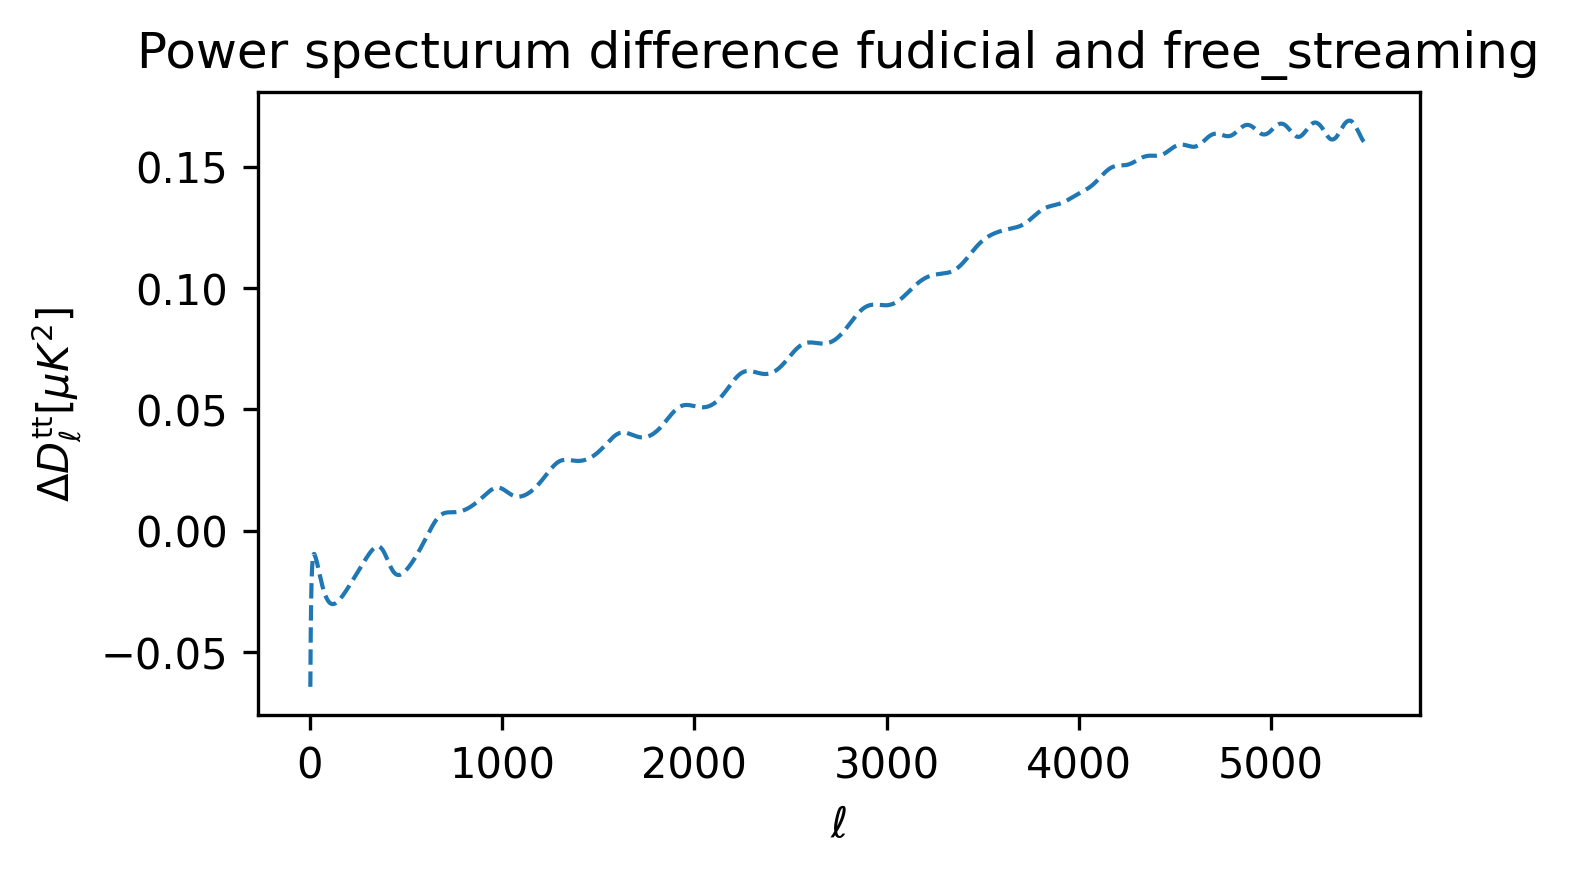

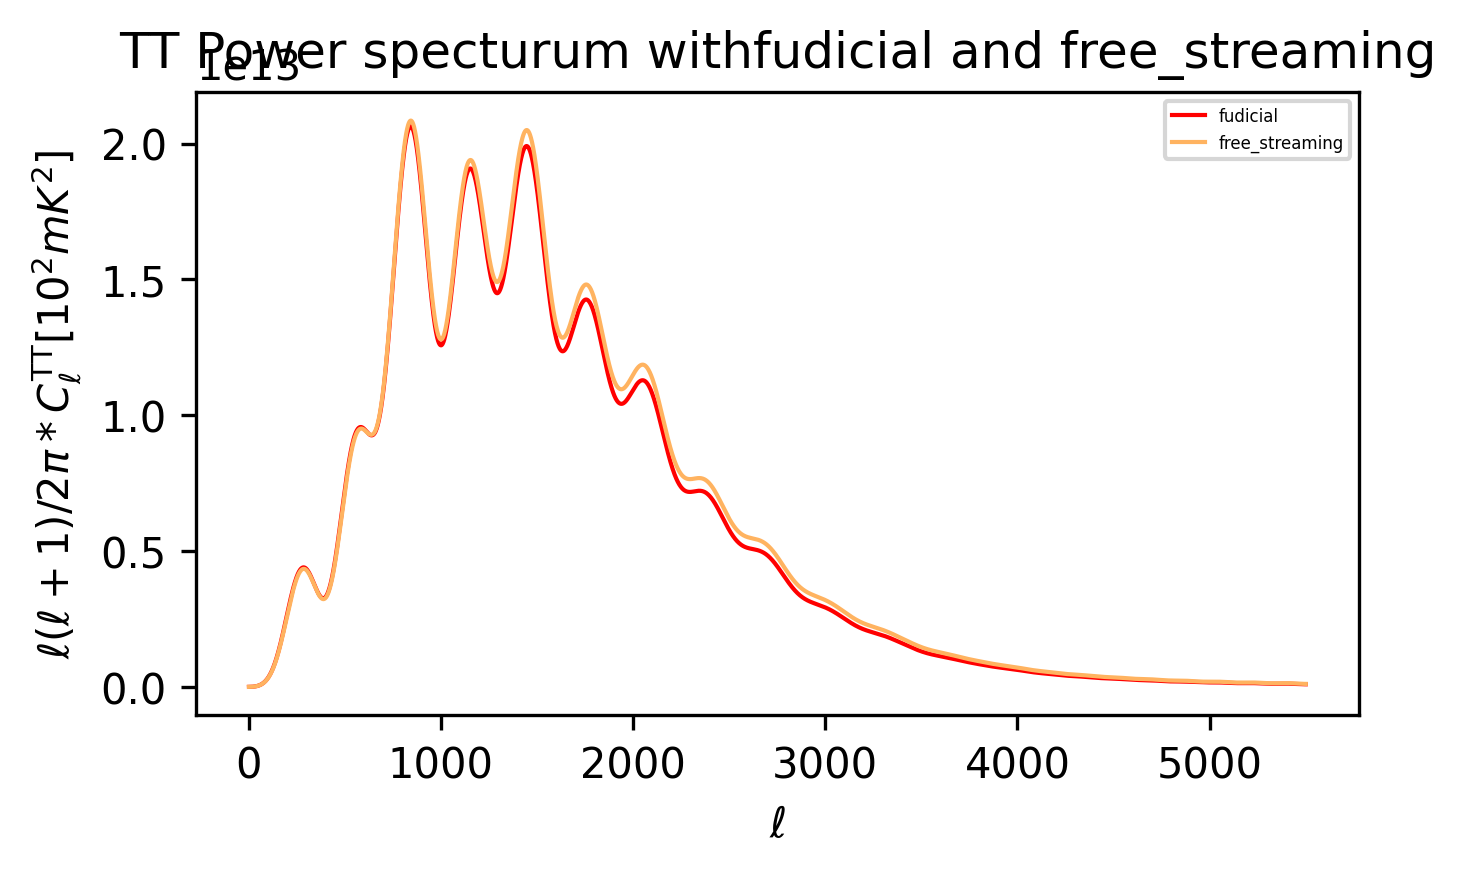

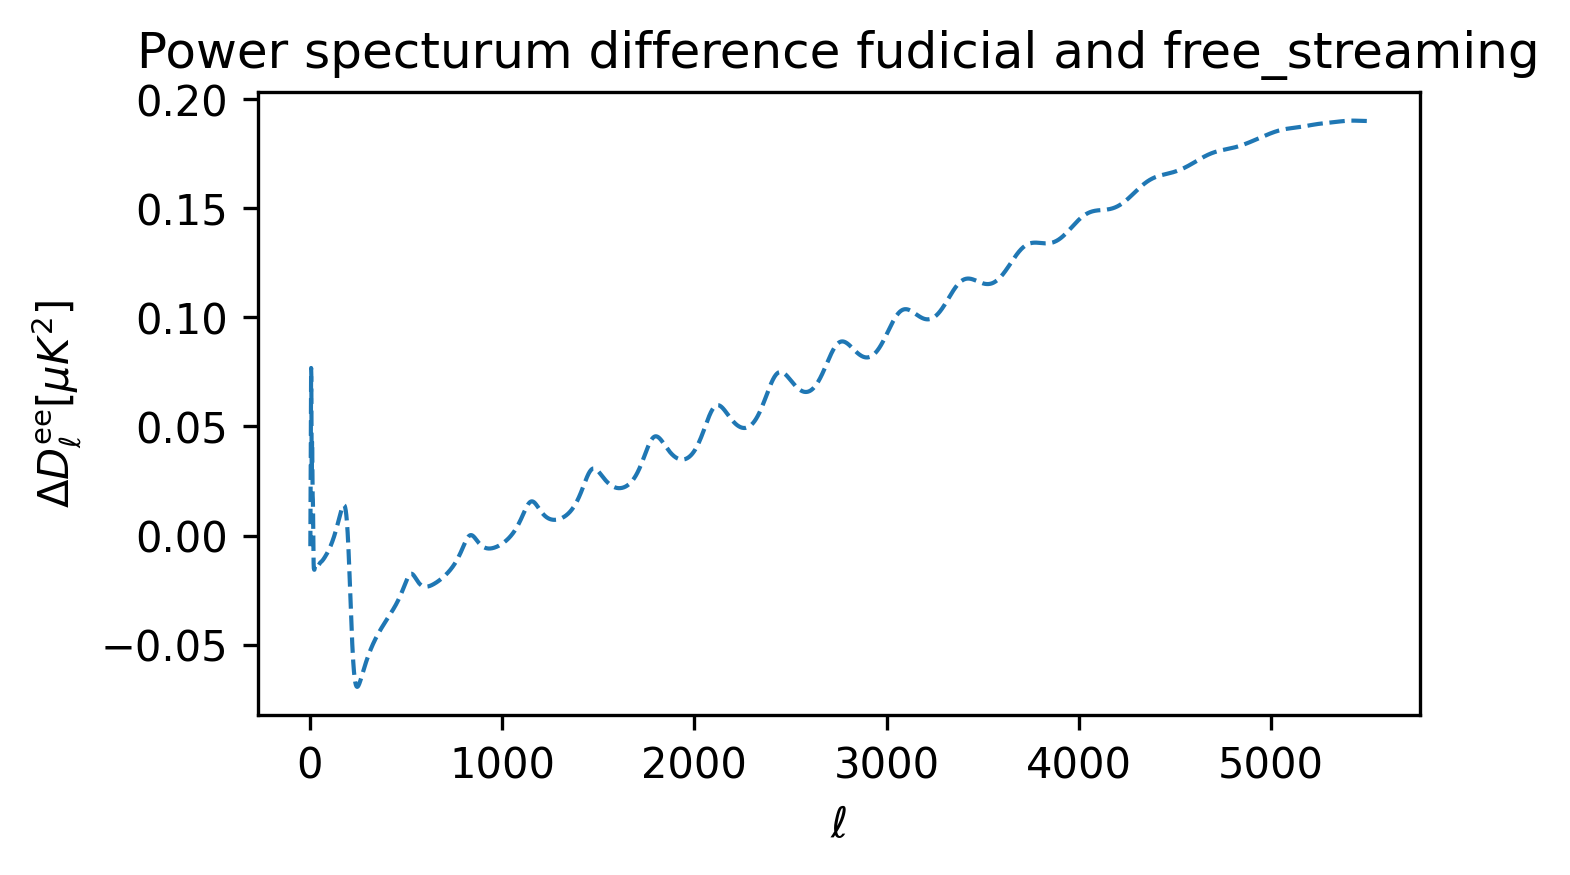

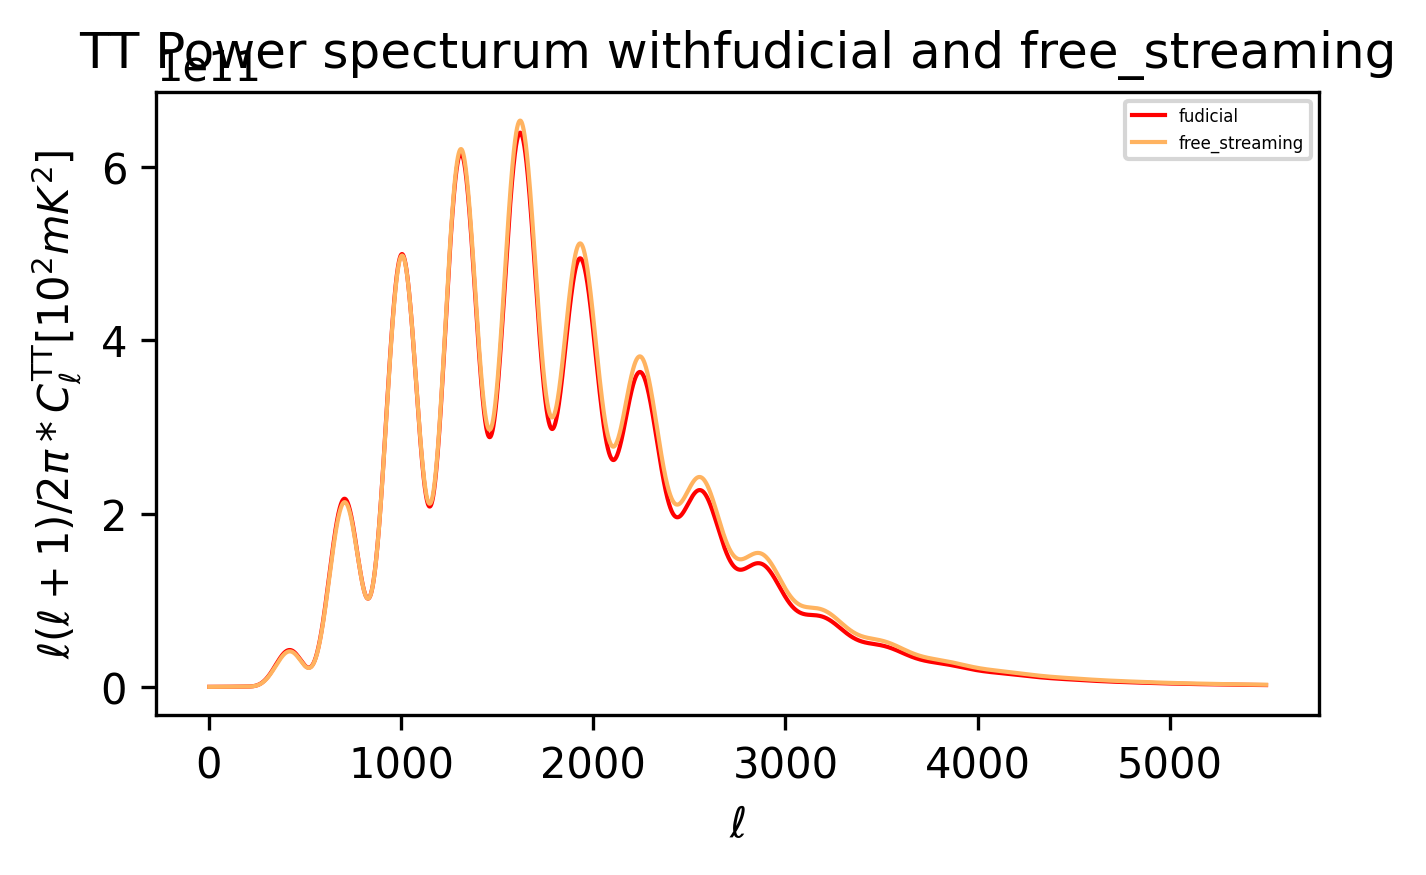

In [47]:
test_Pk(models,0,1)

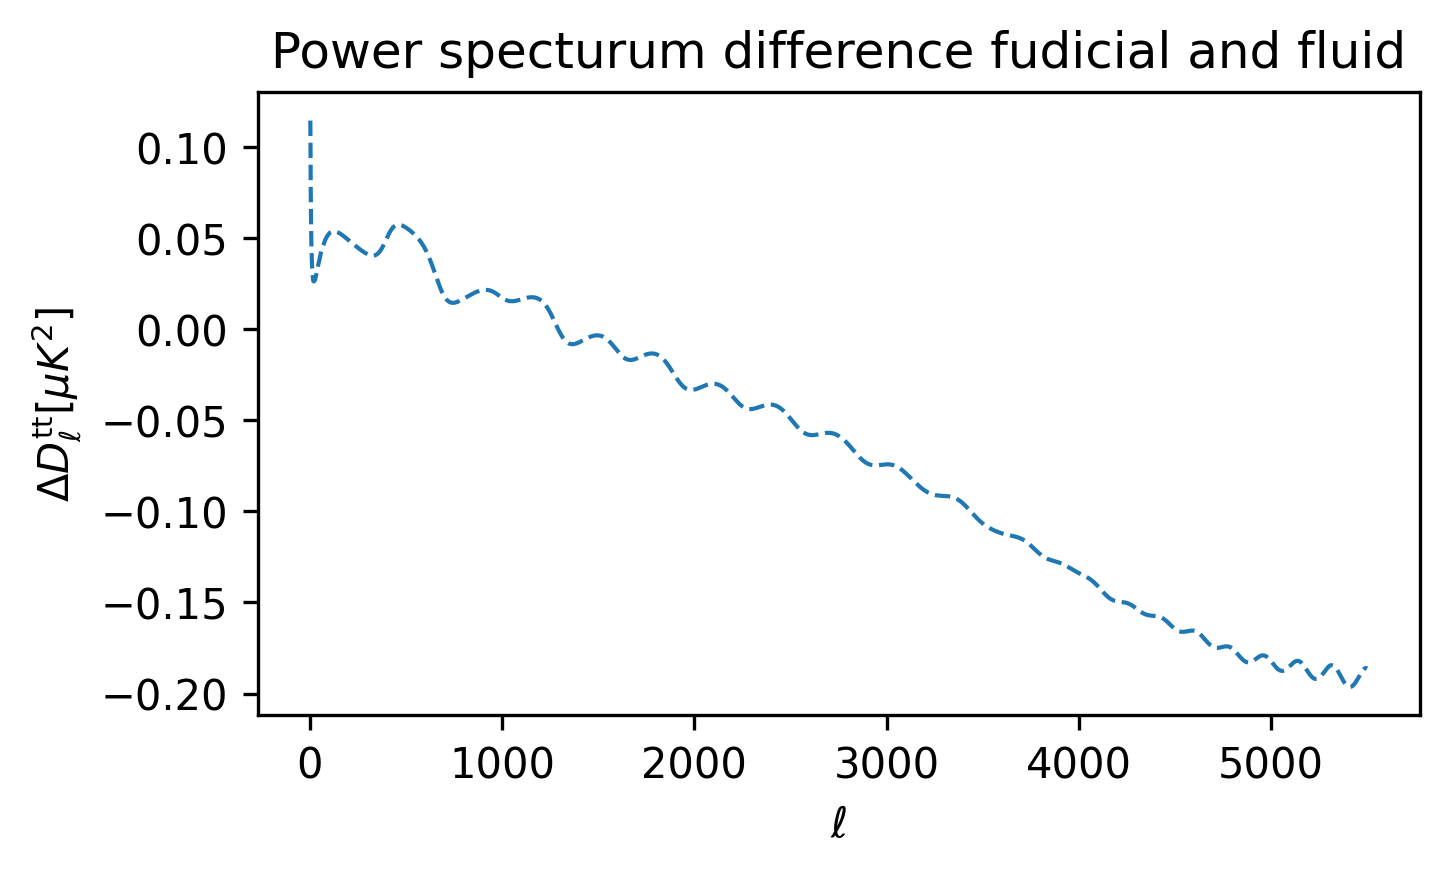

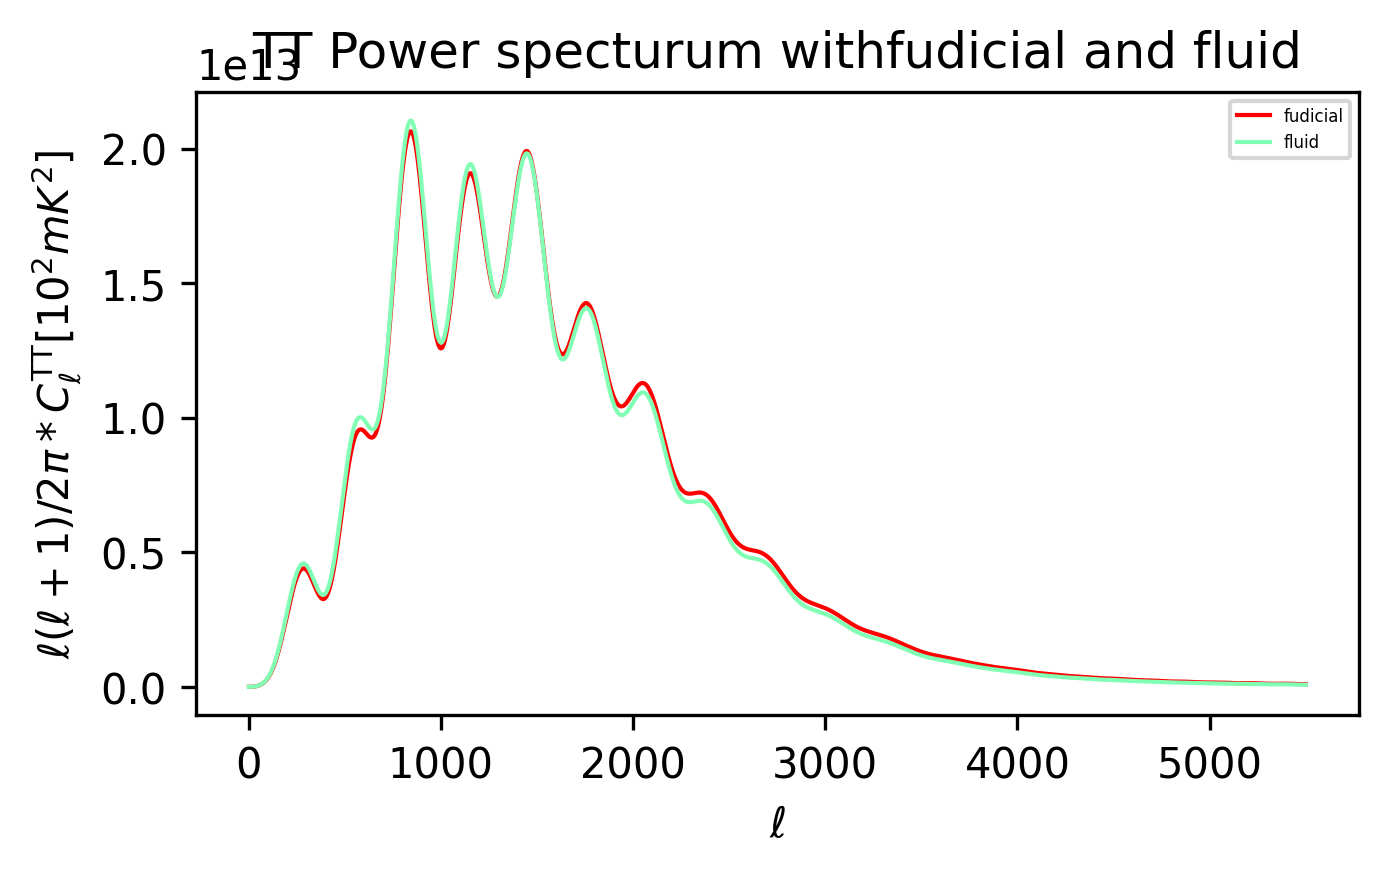

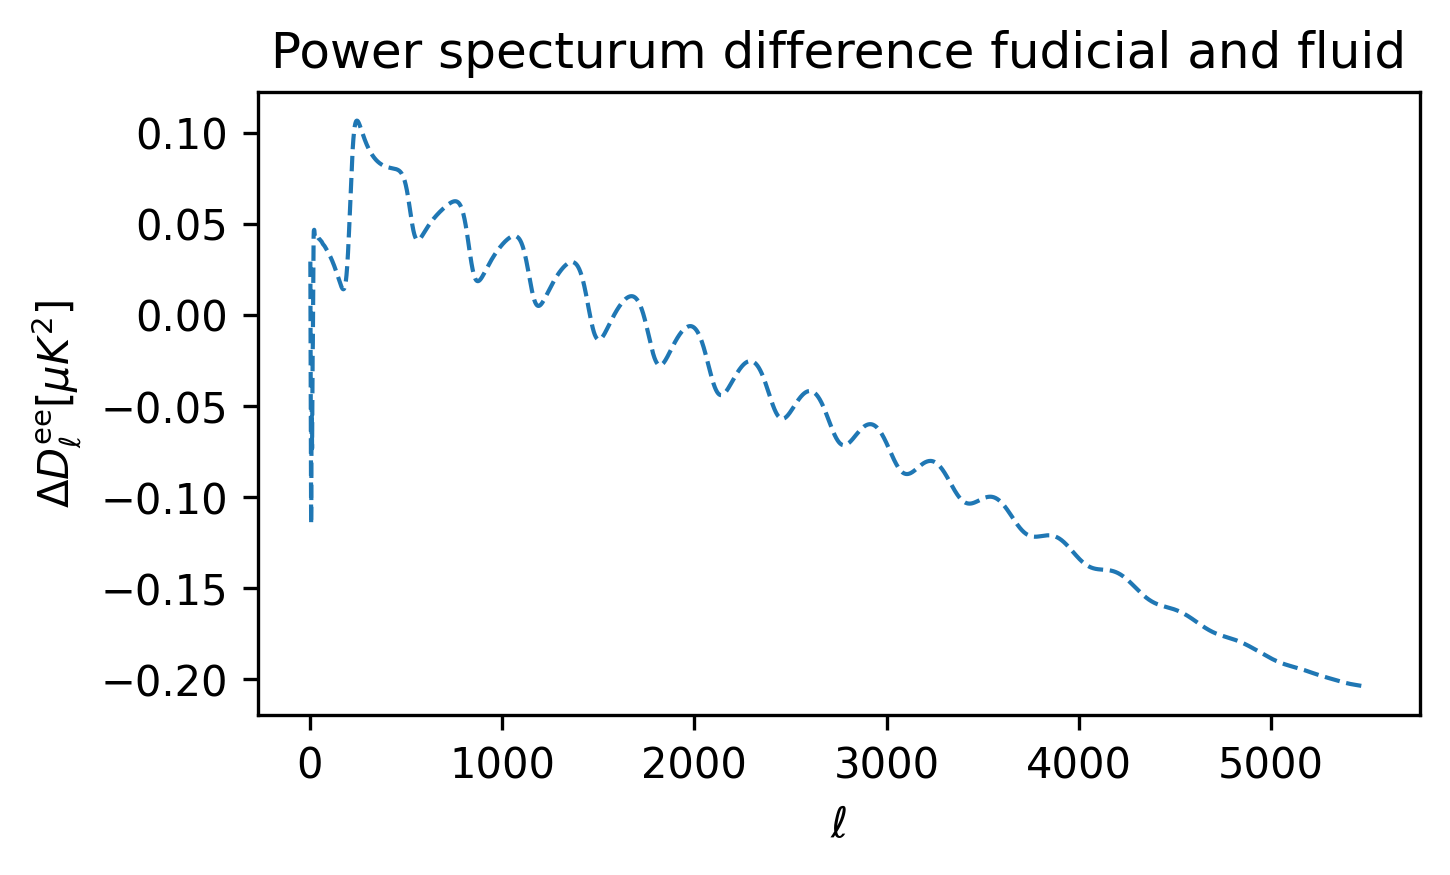

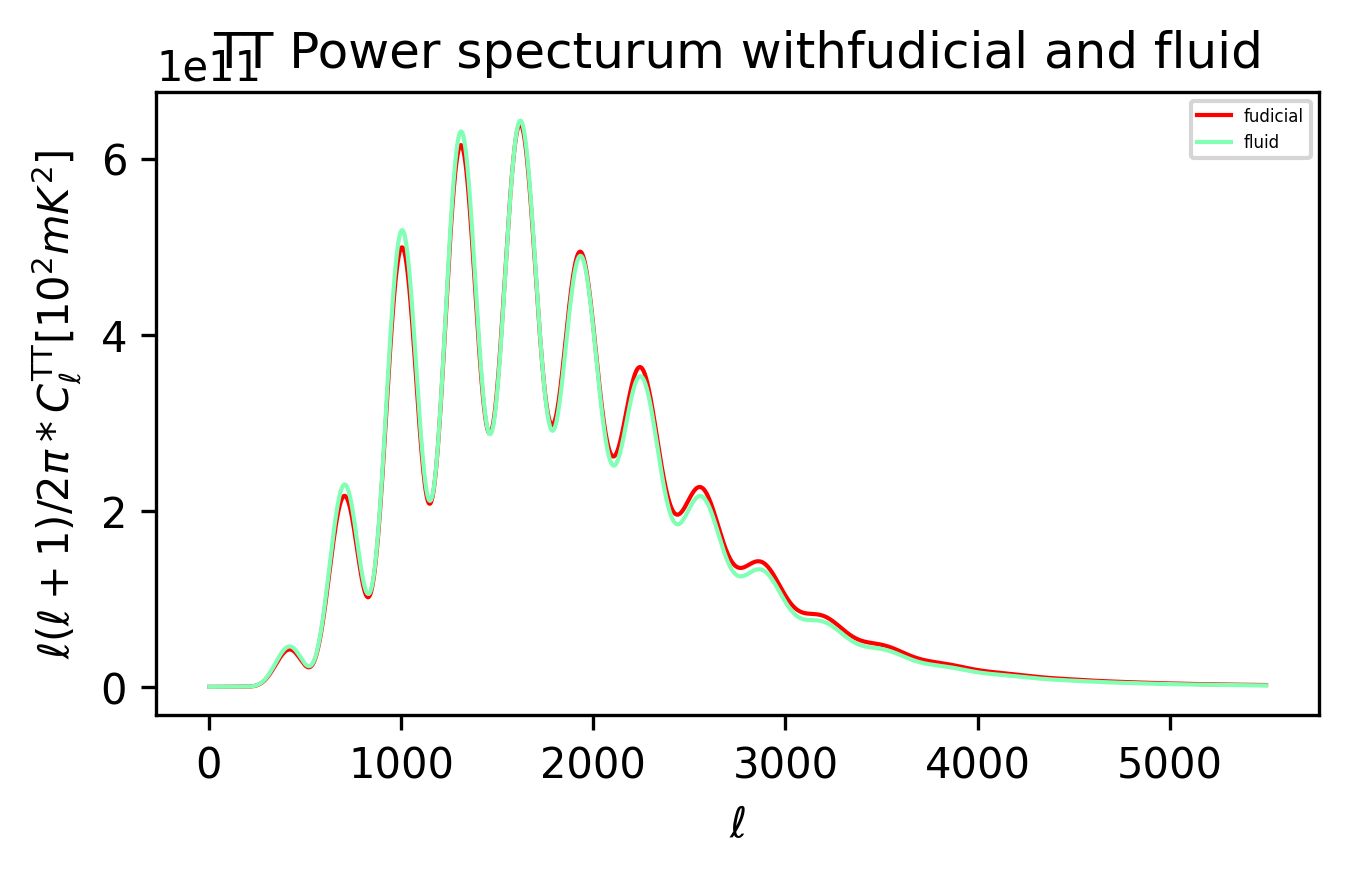

In [48]:
test_Pk(models, 0,2)

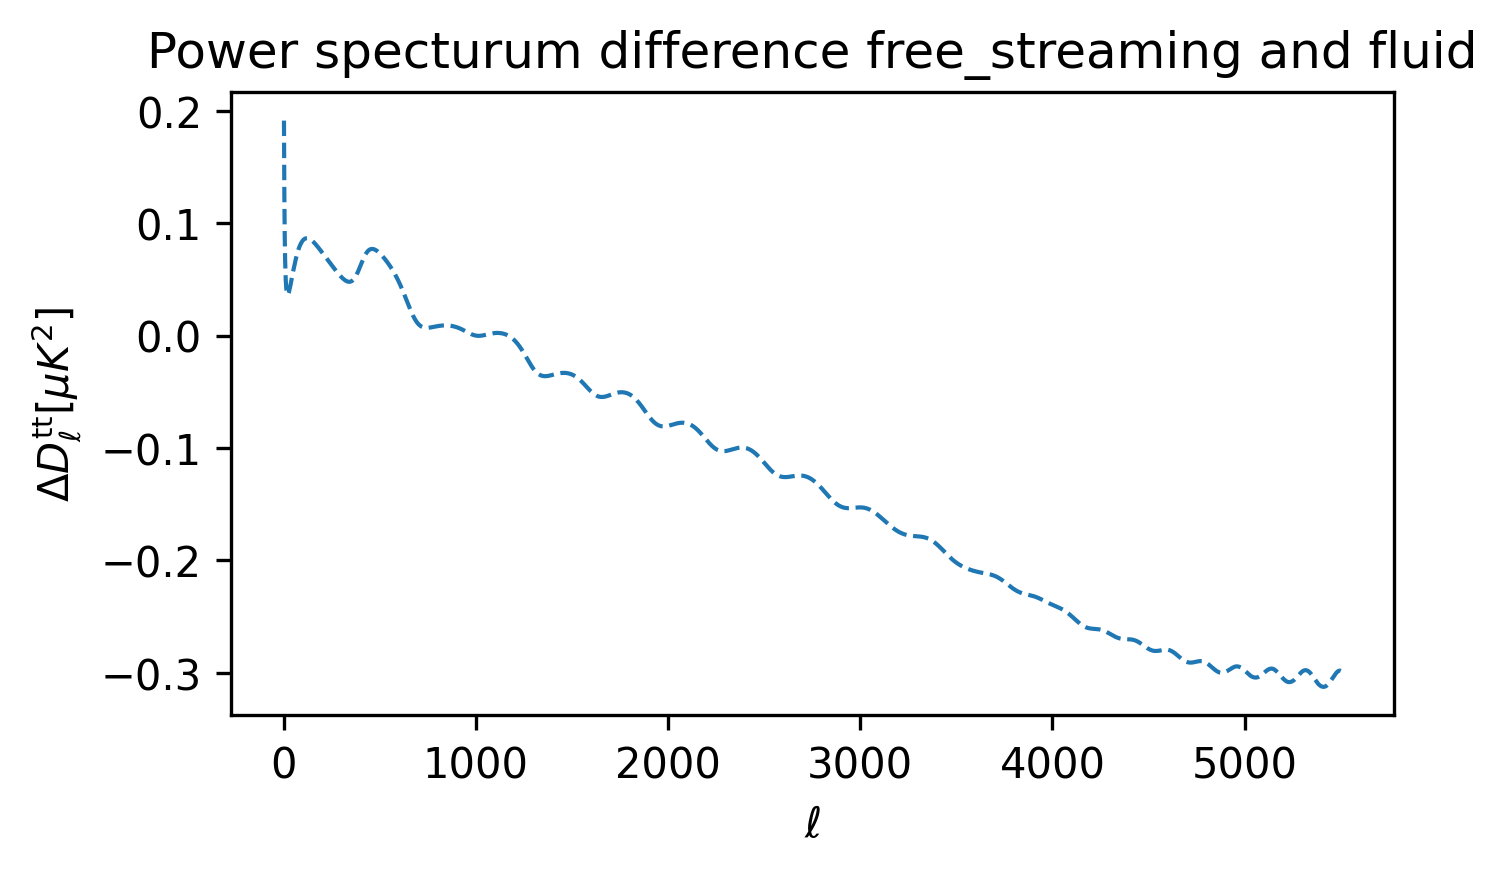

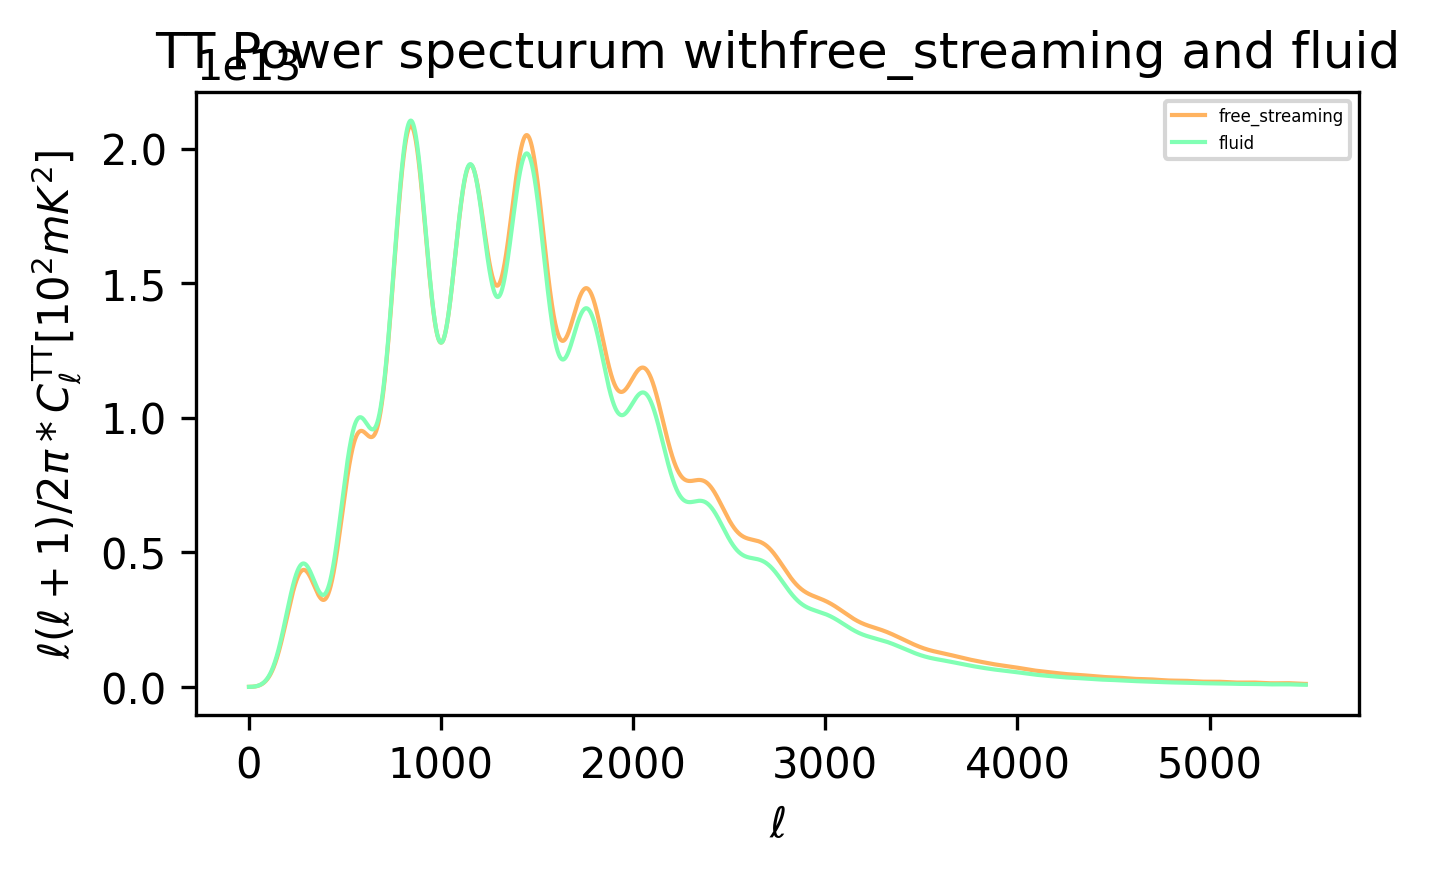

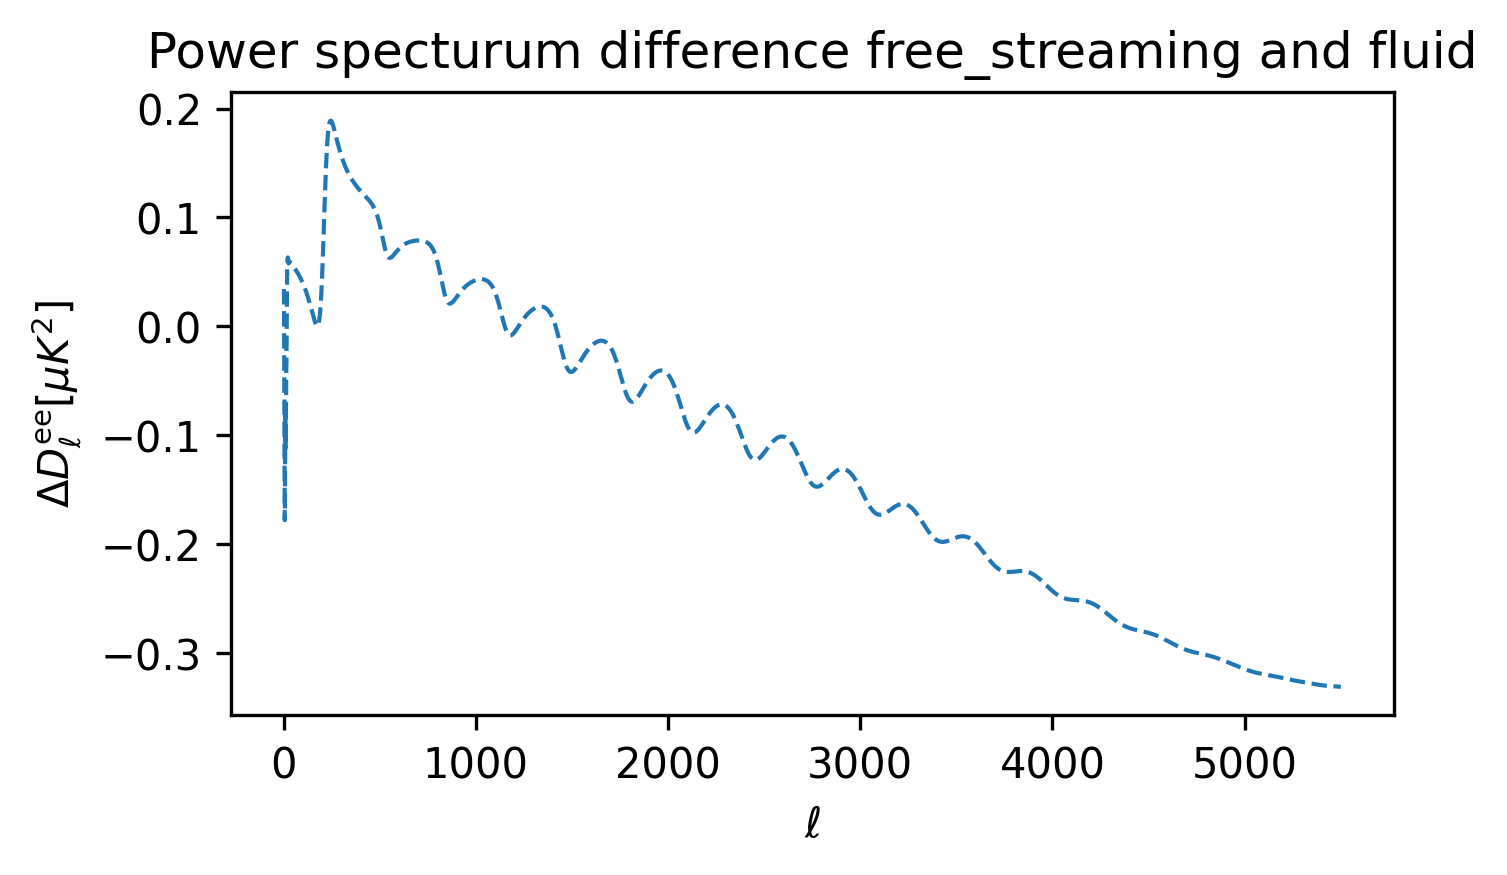

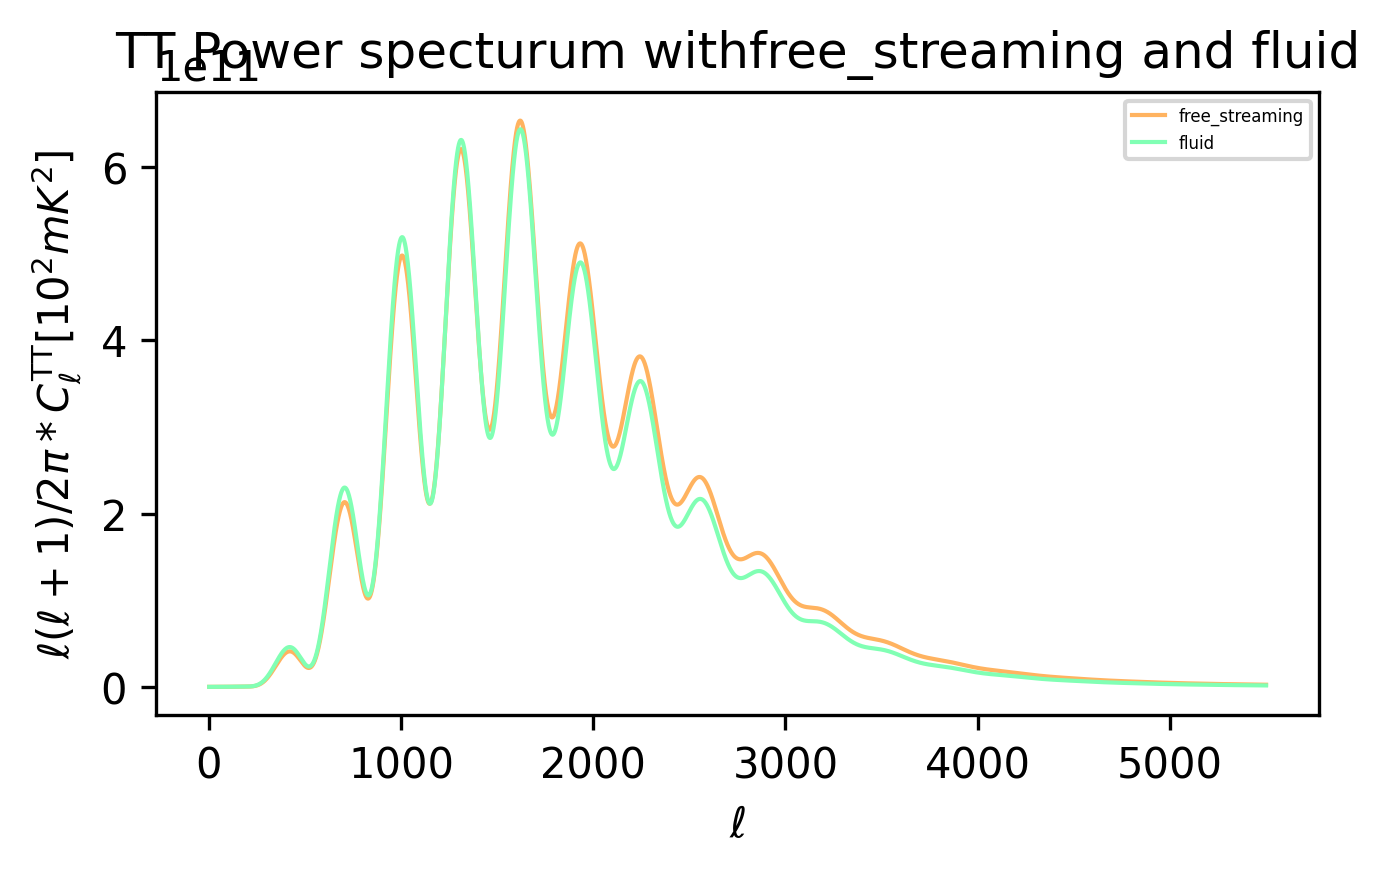

In [49]:
test_Pk(models, 1,2)